In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the unemployment dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/UnemploymentData.csv')

In [ ]:
#basic data exploration
df.head()
df.tail()
df.columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


(768, 7)

In [ ]:
#checking missing values
df.isnull().sum()
df.dropna(inplace=True)#fixing the missing values


In [ ]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
#Convert date column to datetime

# Strip whitespace from all column names first
df.columns = df.columns.str.strip()

# Then, rename specific columns as needed. The keys here are the stripped column names.
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
#Create year and month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

/tmp/ipython-input-1006914304.py:11: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
#Srtatistical summary
df['Unemployment_Rate'].describe()


,Unemployment_Rate
count,740.000000
mean,11.787946
std,10.721298
min,0.000000
25%,4.657500
50%,8.350000
75%,15.887500
max,76.740000


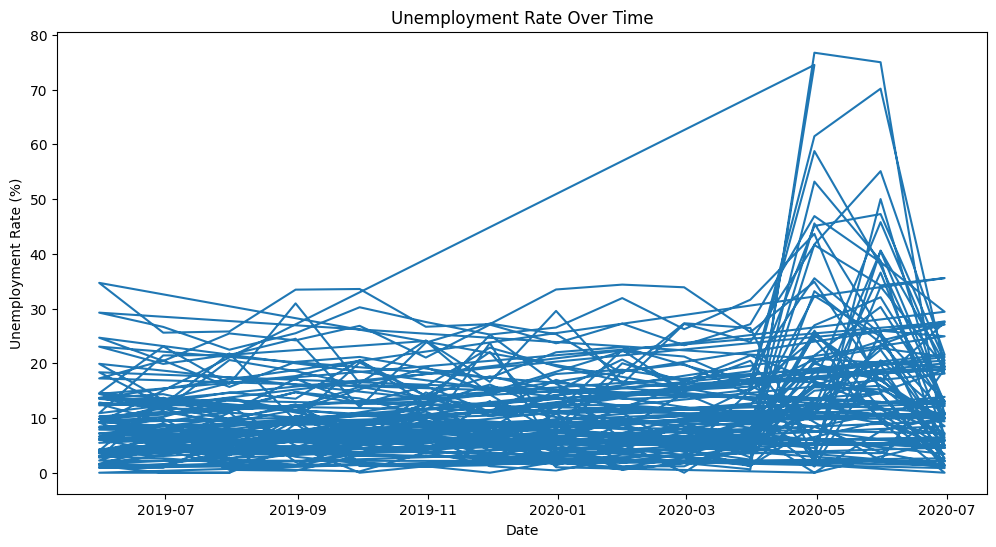

In [ ]:
#Unemployment trend overtime
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Unemployment_Rate'])
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


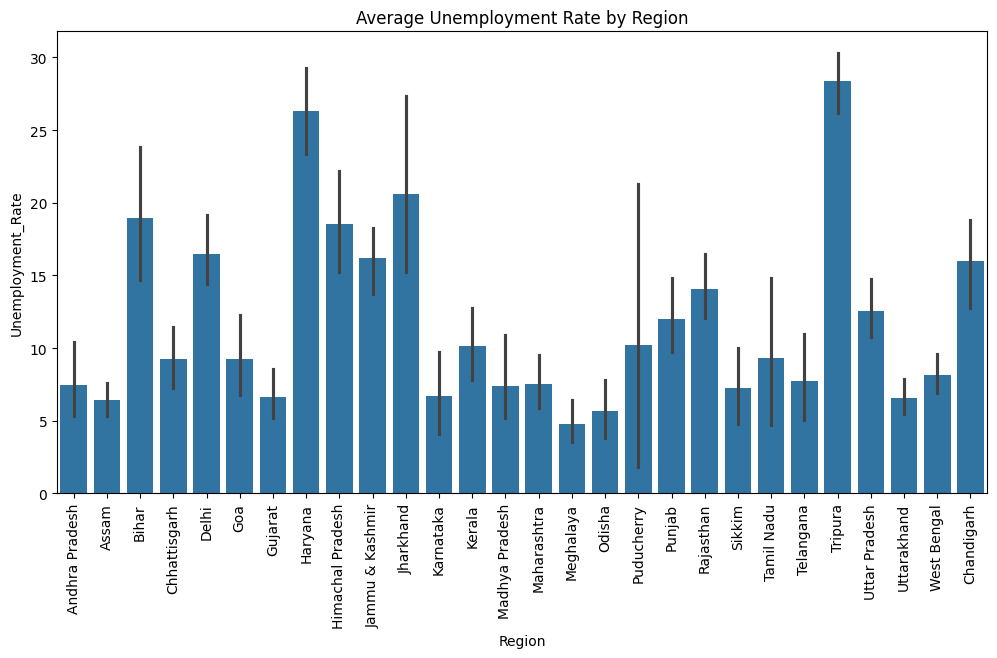

In [ ]:
#Region wise unemployment analysis
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Unemployment_Rate', data=df)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()


Pre-Covid Average Unemployment Rate: 9.399046511627906
Covid Period Average Unemployment Rate: 15.10158064516129


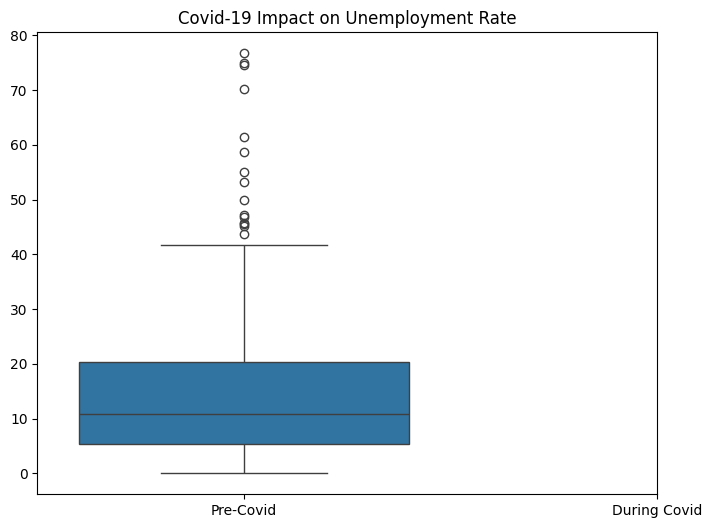

In [ ]:
#Covid 19 impact
#Split data
pre_covid = df[df['Year'] < 2020]
covid = df[df['Year'] >= 2020]
#Compare averages
print("Pre-Covid Average Unemployment Rate:", pre_covid['Unemployment_Rate'].mean())
print("Covid Period Average Unemployment Rate:", covid['Unemployment_Rate'].mean())
#Visualization
plt.figure(figsize=(8,6))
sns.boxplot(data=[pre_covid['Unemployment_Rate'], covid['Unemployment_Rate']])
plt.xticks([0,1], ['Pre-Covid', 'During Covid'])
plt.title("Covid-19 Impact on Unemployment Rate")
plt.show()



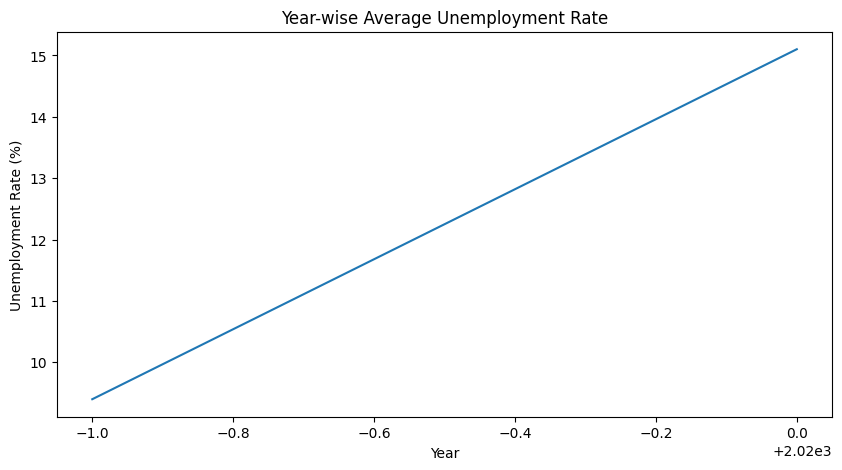

In [ ]:
#Yearwise unemployment trend
yearly_avg = df.groupby('Year')['Unemployment_Rate'].mean()

plt.figure(figsize=(10,5))
yearly_avg.plot(kind='line')
plt.title("Year-wise Average Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


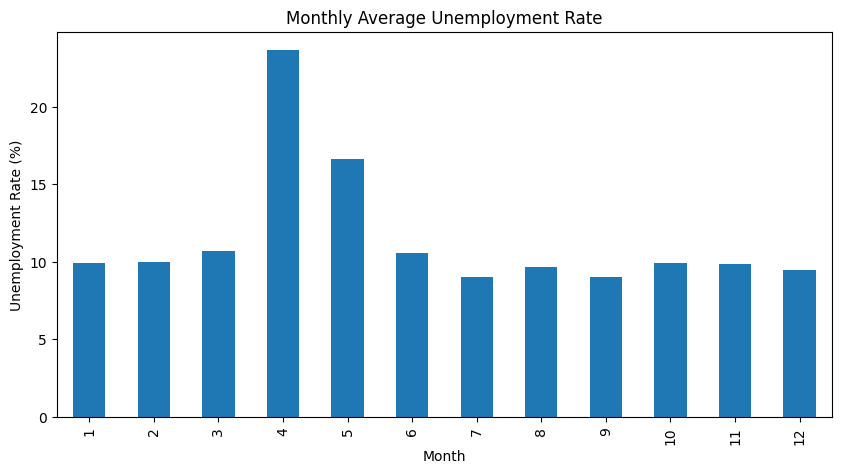

In [ ]:
#Monthly trend analysis
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar')
plt.title("Monthly Average Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()
